In [27]:
import requests 
import pandas as pd 
import datetime
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
start = datetime.datetime.now()
print("Start time: ", start)
cursorMark = "*"
nextCursorMark = None
all_docs = []  # Liste pour stocker tous les résultats
page = 0
while True:
    base_url = "https://api.archives-ouvertes.fr/search/"
    params = {
        "domain_s": "shs.info",
        "rows": 1000,
        "fl": "docid,title_s,abstract_s,fr_keyword_s,publicationDate_tdate",
        "cursorMark": cursorMark,
        "sort": "docid asc",
        "q": (
            "fr_keyword_s:IA OR \"intelligence artificielle\" OR ChatGPT OR "
            "\"IA générative\" OR \"génération de texte\" OR "
            "\"modèle de langage\" OR \"modèles de langage\" OR "
            "\"grand modèle de langage\" OR \"grands modèles de langage\" OR "
            "LLM OR \"large language model\" OR \"large language models\" OR "
            "\"modèle génératif\" OR \"modèles génératifs\" OR "
            "\"modèle de diffusion\" OR \"modèles de diffusion\" OR "
            "Transformer OR \"architecture transformer\" OR GPT OR "
            "\"GPT-2\" OR \"GPT-3\" OR \"GPT-3.5\" OR \"GPT-4\" OR \"GPT-4o\" OR \"GPT-5\" OR "
            "Claude OR Gemini OR \"PaLM 2\" OR Llama OR \"Llama 2\" OR \"Llama 3\" OR "
            "Mistral OR Mixtral OR Grok OR Sora OR "
            "\"Stable Diffusion\" OR \"text-to-image\" OR \"text to image\" OR "
            "\"text-to-video\" OR \"text to video\" OR "
            "\"machine learning\" OR \"apprentissage automatique\" OR \"deep learning\" OR "
            "\"apprentissage profond\" OR \"réseaux de neurones\" OR "
            "\"traitement automatique du langage naturel\" OR TALN OR NLP OR GPT OR "
            "robotique OR \"systèmes intelligents\" OR \"agents intelligents\" OR "
            "\"vision par ordinateur\" OR \"computer vision\" OR \"analyse de données\" OR "
            "\"data science\" OR automatisation"
    )    
    }    
    response = requests.get(base_url, params=params)

    data = response.json()
    docs = data["response"]["docs"]
    all_docs.extend(docs)  # Ajoute les nouveaux résultats à la liste globale
    nextCursorMark = data["nextCursorMark"]
    if nextCursorMark == cursorMark:
        break
    cursorMark = nextCursorMark
    page += 1
    print(f"Page {page} fetched. Total documents: {len(all_docs)}")
# Traitement des résultats
df = pd.DataFrame(all_docs)
df.to_csv("shs_info.csv", index=False, encoding="utf-8")
end = datetime.datetime.now()
print("End time: ", end)
print("Duration: ", end - start)
print("Total rows: ", len(df))

Start time:  2025-04-18 14:41:53.023200
Page 1 fetched. Total documents: 1000
Page 2 fetched. Total documents: 2000
Page 3 fetched. Total documents: 3000
Page 4 fetched. Total documents: 4000
Page 5 fetched. Total documents: 5000
Page 6 fetched. Total documents: 6000
Page 7 fetched. Total documents: 7000
Page 8 fetched. Total documents: 8000
Page 9 fetched. Total documents: 9000
Page 10 fetched. Total documents: 10000
Page 11 fetched. Total documents: 11000
Page 12 fetched. Total documents: 12000
Page 13 fetched. Total documents: 13000
Page 14 fetched. Total documents: 14000
Page 15 fetched. Total documents: 15000
Page 16 fetched. Total documents: 16000
Page 17 fetched. Total documents: 17000
Page 18 fetched. Total documents: 18000
Page 19 fetched. Total documents: 19000
Page 20 fetched. Total documents: 20000
Page 21 fetched. Total documents: 21000
Page 22 fetched. Total documents: 22000
Page 23 fetched. Total documents: 23000
Page 24 fetched. Total documents: 24000
Page 25 fetched. T

In [21]:
df = pd.read_csv("shs_info.csv", encoding="utf-8")
df = df.drop_duplicates(subset=["docid"])
df = df.reset_index(drop=True)
df = df.dropna(subset=["fr_keyword_s"])  # Ne supprime les lignes que si fr_keyword_s est NaN
df['year'] = pd.to_datetime(df['publicationDate_tdate'], errors='coerce').dt.year
df = df.drop(columns=["publicationDate_tdate"])  # Supprime la colonne date complète


print(len(df))
df.head(10)

67123


,docid,title_s,abstract_s,fr_keyword_s,year
9,100034,['Alpha-Jacobian environmental adaptation'],['The robustness of automatic speech recogniti...,"['Jacobian adaptation', 'Compensation des modè...",2004
15,100041,['Combining Higher-Order Wavelets and Disconti...,['The radiosity method is used for global illu...,"['Discontinuity meshing', 'Maillage de discont...",2004
16,1000416,['Programme ALTERPRO Mise au point de stratégi...,"[""La processionnaire du pin, Thaumetopoea pity...","['ALTERPRO', 'Biocontrôle', 'Lutte alternative...",2012
25,1000548,['SEXYTROUT - Caractérisation du phénotype gon...,['absent'],"['Expression des gènes', 'Déterminisme sexuel'...",2012
27,1000639,['Développement de la lutte biologique afin de...,['absent'],"['Parus sp', 'Parus sp', 'Mésange', 'Biocontrô...",2012
32,100072,['FPNA: concepts and properties'],['Neural networks are usually considered as na...,"['Réseaux de neurones', 'Neural networks', 'Fi...",2004
33,100073,['FPNA: applications and implementations'],['Neural networks are usually considered as na...,"['Parallélisme à grain fin', 'Réseaux de neuro...",2004
34,100074,['New classification quality estimators for an...,"[""In the procedure of information analysis, on...","['Neural networks', 'Classification', 'Quality...",2004
35,100075,['Optimized Data Analysis Based on Neural Netw...,['This paper summarizes our experiments in tex...,"['Neural network', 'Fouille des données du web...",2004
38,100080,['Parallel FPGA implementation of self-organiz...,['This paper presents an area-saving parallel ...,"['Low-power', 'Vigilance', 'Alertness', 'Neura...",2004


In [40]:
def count_keywords(df: pd.DataFrame,
                   column: str = "fr_keyword_s",
                   delimiter: str = ";",
                   lowercase: bool = True) -> pd.DataFrame:
    """
    Compte la fréquence des mots‑clés contenus dans une colonne d'un DataFrame.
    """
    def _extract_keywords(cell):
        """Sous‑fonction : normalise une cellule en liste de mots‑clés."""
        # Gérer le cas des listes ou tableaux NumPy
        if isinstance(cell, (list, np.ndarray)):
            return cell
            
        if pd.isna(cell):
            return []
            
        # déjà une liste Python
        if isinstance(cell, list):
            return cell

        # tenter de parser une représentation de liste
        try:
            parsed = ast.literal_eval(cell)
            if isinstance(parsed, list):
                return parsed
        except (ValueError, SyntaxError):
            pass

        # sinon, on suppose que c'est une chaîne plate à découper
        return [kw.strip() for kw in str(cell).split(delimiter) if kw.strip()]

    # extraction + explosion
    keywords_series = (
        df[column]
        .apply(_extract_keywords)     # -> liste de mots
        .explode()                    # -> une ligne par mot
        .dropna()                     # retire les NaN éventuels
        .astype(str)                  # assure le type str pour str.lower
    )

    if lowercase:
        keywords_series = keywords_series.str.lower().str.strip()

    counts = (
        keywords_series
        .value_counts()
        .rename_axis("Keyword")
        .reset_index(name="Count")
        .sort_values("Count", ascending=False)
    )

    return counts

kw_counts = count_keywords(df, column="fr_keyword_s", delimiter=",")
kw_counts.head(50)

,Keyword,Count
0,intelligence artificielle,2536
1,apprentissage automatique,1453
2,apprentissage profond,1205
3,france,847
4,modélisation,830
5,robotique,726
6,réseaux de neurones,629
7,vision par ordinateur,576
8,biomecanique,573
9,apprentissage,542


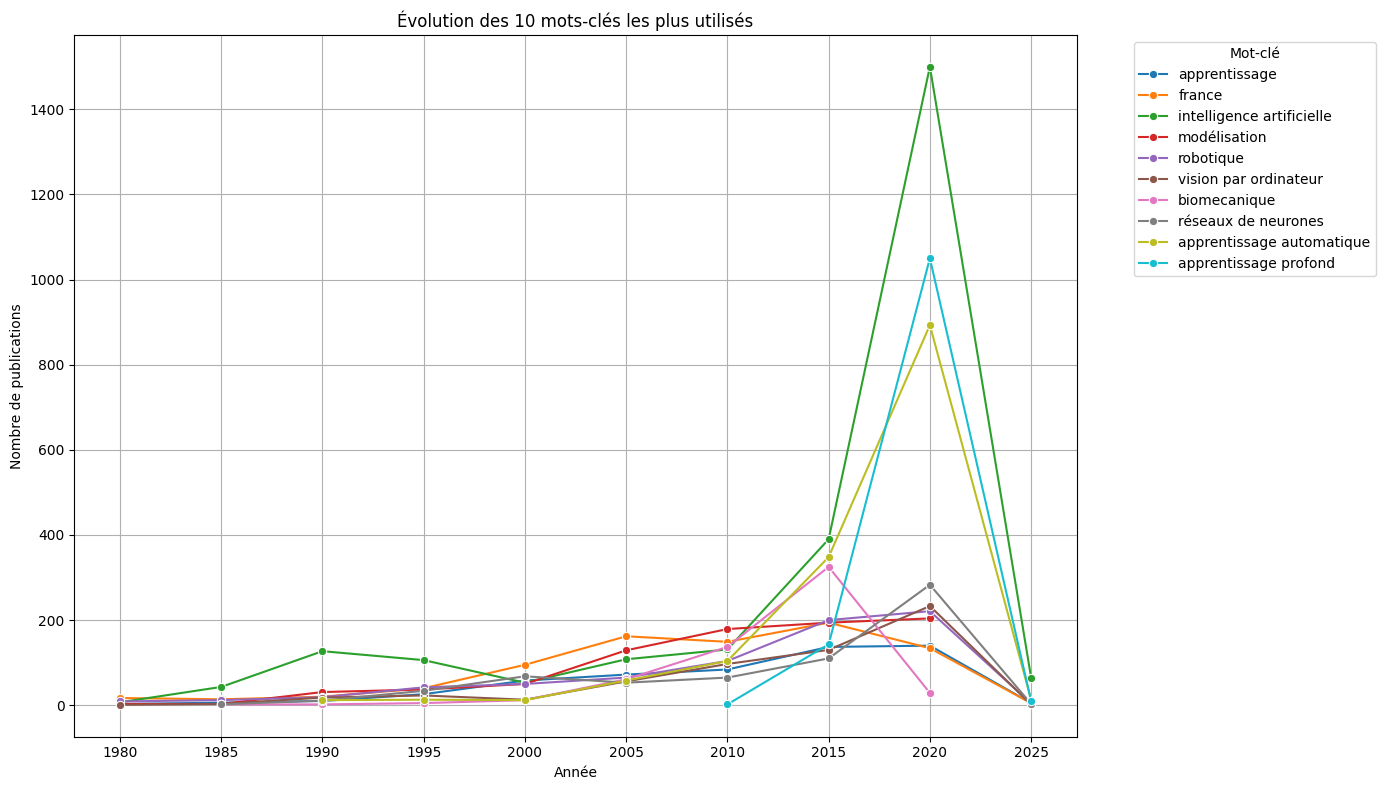

In [35]:
# Extraction propre des mots-clés
def extract_keywords(cell):
    import ast
    if pd.isna(cell):
        return []
    if isinstance(cell, list):
        return cell
    try:
        val = ast.literal_eval(cell)
        if isinstance(val, list):
            return val
    except (ValueError, SyntaxError):
        pass
    return [kw.strip() for kw in str(cell).split(';') if kw.strip()]

# Appliquer l'extraction
df['keywords_list'] = df['fr_keyword_s'].apply(extract_keywords).apply(lambda lst: [kw.lower() for kw in lst])

# Trouver les 10 mots-clés les plus fréquents
from collections import Counter
all_keywords = [kw for sublist in df['keywords_list'] for kw in sublist]
top10 = [kw for kw, _ in Counter(all_keywords).most_common(10)]

# Préparer les données pour le graphique
df_exploded = df.explode('keywords_list')
df_top10 = df_exploded[df_exploded['keywords_list'].isin(top10)]
keywords_by_year = df_top10.groupby(['year', 'keywords_list']).size().reset_index(name='count')

# Créer des tranches de 5 ans à partir de 2000
bins = np.arange(1980, df['year'].max() + 6, 5)
labels = bins[:-1]
keywords_by_year['year_group'] = pd.cut(keywords_by_year['year'], bins=bins, labels=labels, right=False).astype(float)

# Grouper par tranche de 5 ans et mot-clé
keywords_by_5years = keywords_by_year.groupby(['year_group', 'keywords_list'])['count'].sum().reset_index()

# Tracer avec seaborn
plt.figure(figsize=(14,8))
sns.lineplot(
    data=keywords_by_5years,
    x='year_group',
    y='count',
    hue='keywords_list',
    marker='o'
)
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.title("Évolution des 10 mots-clés les plus utilisés")
plt.xticks(labels)  # Affiche 2000, 2005, 2010, etc.
plt.legend(title="Mot-clé", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
def regroupe_mots_cles(df, col_keywords, dict_regroupement, col_destination=None):
    """
    Regroupe les mots-clés selon un dictionnaire de correspondance.
    
    Parameters
    ----------
    df : pd.DataFrame
        Le DataFrame contenant les mots-clés à regrouper.
    col_keywords : str
        Nom de la colonne contenant les mots-clés (liste de mots-clés).
    dict_regroupement : dict
        Dictionnaire où les clés sont les catégories et les valeurs sont des 
        listes de mots-clés à inclure dans cette catégorie.
    col_destination : str, optional
        Nom de la colonne de destination. Si None, modifie la colonne source.
    
    Returns
    -------
    pd.DataFrame
        DataFrame avec les mots-clés regroupés.
    """
    # Copie du DataFrame pour éviter la modification en place
    df_result = df.copy()
    
    # Définir la colonne de destination
    if col_destination is None:
        col_destination = col_keywords
    
    # Fonction pour regrouper un mot-clé individuel
    def regroupe_mot_cle(mot):
        for categorie, liste_mots in dict_regroupement.items():
            if mot.lower() in (m.lower() for m in liste_mots):
                return categorie
        return mot  # Si pas de correspondance, conserver le mot-clé original
    
    # Appliquer le regroupement sur chaque liste de mots-clés
    df_result[col_destination] = df_result[col_keywords].apply(
        lambda lst: [regroupe_mot_cle(mot) for mot in lst] if isinstance(lst, list) else []
    )
    
    return df_result

keyword_groups = {
    # --- IA & Méta‑catégories -----------------------------------------------
    "intelligence_artificielle": [
        "intelligence artificielle", "ia", "ia générative", "artificial intelligence"
    ],

    # --- Apprentissage / Machine learning ------------------------------------
    "apprentissage": [
        "apprentissage automatique", "machine learning", "apprentissage machine",
        "apprentissage statistique", "apprentissage", "deep learning",
        "apprentissage profond", "apprentissage par renforcement",
        "reinforcement learning"
    ],

    # --- Réseaux de neurones --------------------------------------------------
    "réseaux_neurones": [
        "réseaux de neurones", "réseaux de neurones artificiels",
        "neural networks", "ann", "cnn", "rnn", "gan"
    ],

    # --- Vision par ordinateur / Computer vision -----------------------------
    "vision_par_ordinateur": [
        "vision par ordinateur", "computer vision", "segmentation",
        "détection d'objets", "object detection", "classification d'image",
        "image classification"
    ],

    # --- Robotique & automatisation ------------------------------------------
    "robotique": [
        "robotique", "automatisation", "robots", "robotics", "automated systems"
    ],

    # --- Analyse & fouille de données ----------------------------------------
    "analyse_de_donnees": [
        "analyse de données", "fouille de données", "data mining",
        "data analysis", "data analytics", "exploration de données"
    ],

    # --- Optimisation & ordonnancement ---------------------------------------
    "optimisation": [
        "optimisation", "ordonnancement", "scheduling", "metaheuristics",
        "meta‑heuristiques"
    ],

    # --- Modélisation & simulation -------------------------------------------
    "modelisation": [
        "modélisation", "simulation", "modeling", "modelling"
    ],

    # --- Imagerie médicale ----------------------------------------------------
    "imagerie_medicale": [
        "imagerie médicale", "medical imaging", "radiomics"
    ],

    # --- Diagnostic & évaluation ---------------------------------------------
    "diagnostic_evaluation": [
        "diagnostic", "évaluation", "assessment", "fault diagnosis"
    ],

    # --- Innovation & numérique ----------------------------------------------
    "innovation": [
        "innovation", "numérique", "digital", "transformation numérique",
        "digital transformation"
    ],

    # --- Enseignement & formation --------------------------------------------
    "enseignement": [
        "enseignement", "formation", "education", "pedagogy", "formation continue"
    ],

    # --- Santé & médecine -----------------------------------------------------
    "sante": [
        "santé", "cancer", "médecine", "health", "medicine", "oncology"
    ],

    # --- Sciences humaines & sociales ----------------------------------------
    "histoire": [
        "histoire", "moyen âge", "archéologie", "archaeology", "history",
        "humanities"
    ],
    "droit_affaires": [
        "droit de l'entreprise et des affaires", "business law", "corporate law"
    ],
    "ethique": [
        "éthique", "ethics", "responsabilité", "responsibility"
    ],
    "genre": [
        "genre", "gender studies", "gender"
    ],

    # --- Domaines/secteurs ----------------------------------------------------
    "biomecanique": ["biomecanique", "biomechanics"],
    "ceramique": ["céramique", "ceramics"],
    "territoire": ["territoire", "territory", "urban studies"],
    "ontologie": ["ontologie", "ontology"],

    # Mots‑clés géographiques
    "france": ["france"],
    "italie": ["italie", "italy"],
    "europe": ["europe", "european"],
}


# Appliquer le regroupement
df_kw_grouped = regroupe_mots_cles(df, "keywords_list", keyword_groups, "keywords_grouped")


# Compter les occurrences des mots-clés regroupés
kw_counts_grouped = count_keywords(df_kw_grouped, column="keywords_grouped", delimiter=",")
kw_counts_grouped.head(100)

,Keyword,Count
0,apprentissage,4677
1,intelligence_artificielle,2878
2,modelisation,1360
3,robotique,1194
4,réseaux_neurones,961
...,...,...
95,corps,118
96,systèmes multi-agents,118
97,enfant,117
98,interaction,117


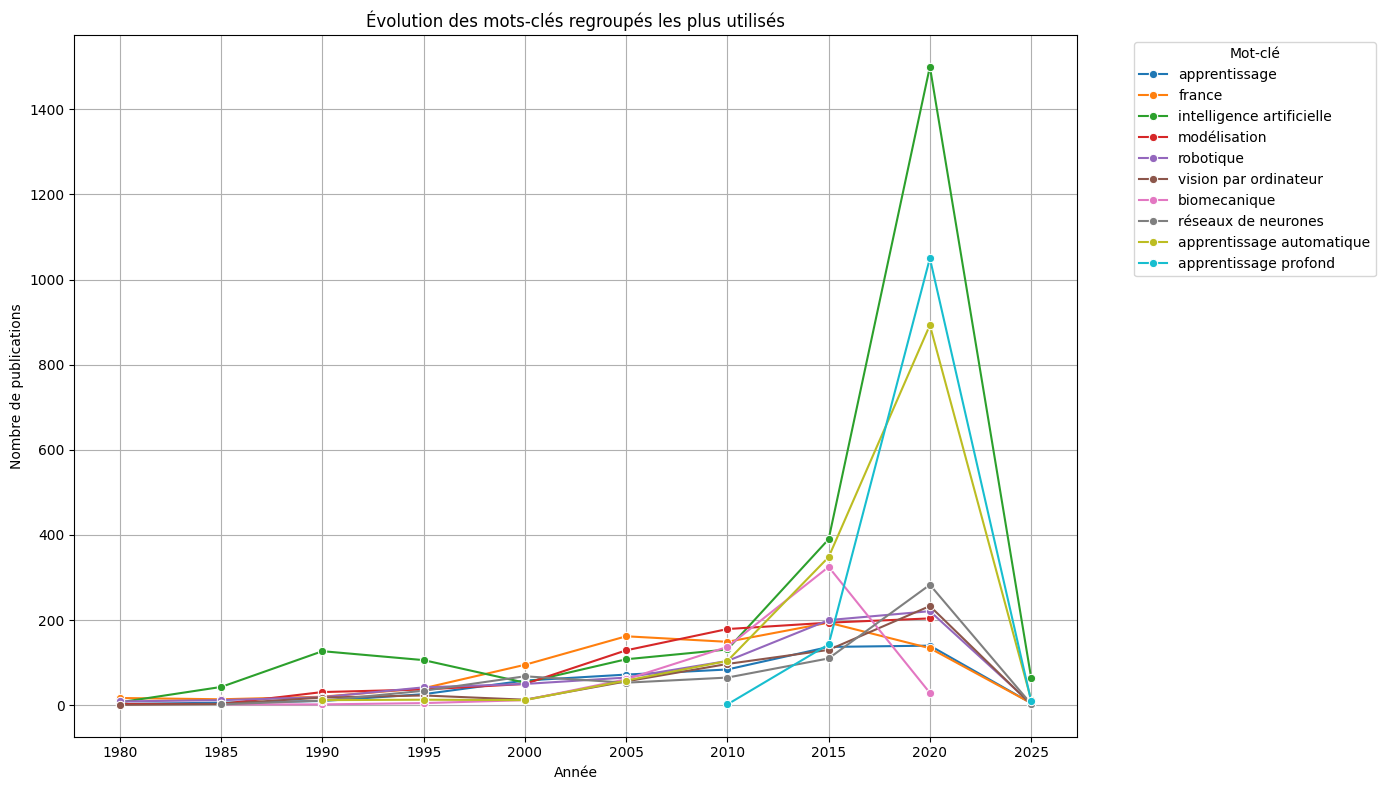

In [ ]:
# Préparer les données pour le graphique avec les mots-clés regroupés
df_exploded_grouped = df_kw_grouped.explode('keywords_grouped')

# Récupérer les 10 premiers groupes de mots-clés les plus fréquents
top_grouped_keywords = kw_counts_grouped.head(10)['Keyword'].tolist()

# Filtrer le DataFrame pour ne garder que les entrées avec les groupes de mots-clés top 10
df_top_grouped = df_exploded_grouped[df_exploded_grouped['keywords_grouped'].isin(top_grouped_keywords)]

# Grouper par année et groupe de mots-clés pour compter les occurrences
grouped_keywords_by_year = df_top_grouped.groupby(['year', 'keywords_grouped']).size().reset_index(name='count')

# Créer des tranches de 5 ans (comme dans le code original)
bins = np.arange(1980, df['year'].max() + 6, 5)
labels = bins[:-1]
grouped_keywords_by_year['year_group'] = pd.cut(grouped_keywords_by_year['year'], bins=bins, labels=labels, right=False).astype(float)

# Grouper par tranche de 5 ans et groupe de mots-clés
grouped_keywords_by_5years = grouped_keywords_by_year.groupby(['year_group', 'keywords_grouped'])['count'].sum().reset_index()

# Tracer avec seaborn
plt.figure(figsize=(14,8))
sns.lineplot(
    data=grouped_keywords_by_5years,
    x='year_group',
    y='count',
    hue='keywords_grouped',
    marker='o'
)
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.title("Évolution des groupes de mots-clés les plus utilisés")
plt.xticks(labels)  # Affiche les années par tranche de 5 ans
plt.legend(title="Groupe de mots-clés", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

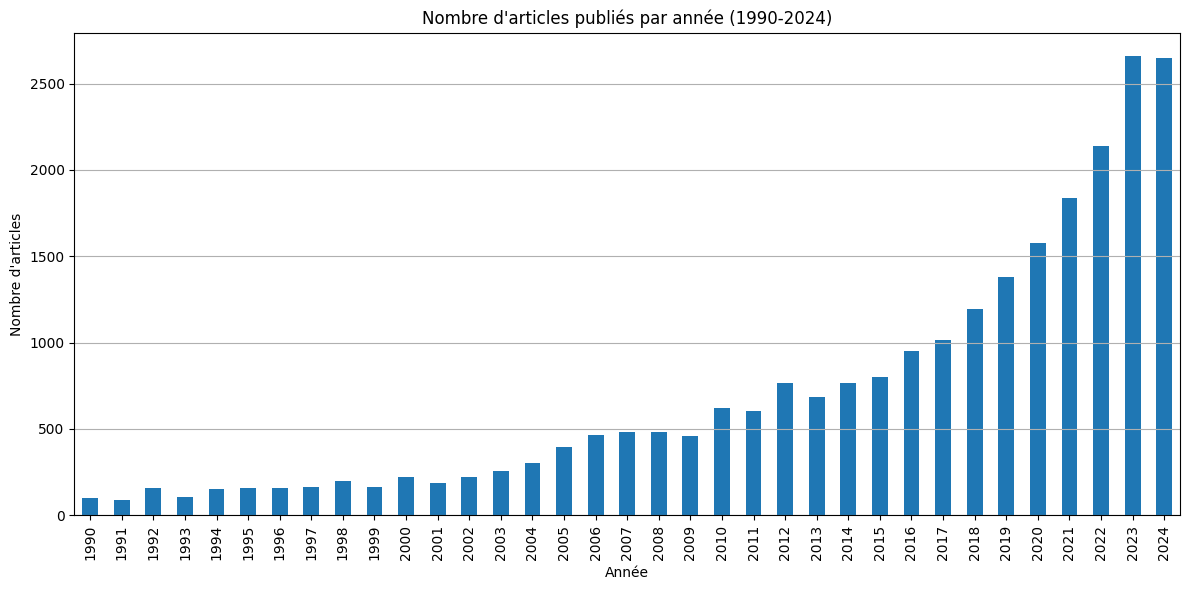

In [15]:
# Définir la plage d'années souhaitée
years = np.arange(1990, 2025)

# Compter le nombre d'articles par année et réindexer pour inclure toutes les années de 1990 à 2024
articles_per_year = df['year'].value_counts().reindex(years, fill_value=0).sort_index()

plt.figure(figsize=(12,6))
articles_per_year.plot(kind='bar')
plt.xlabel("Année")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles publiés par année (1990-2024)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()